## This notebook does sentiment analysis on collected tweets

In [163]:
!pip install matplotlib

In [164]:
!pip install seaborn

In [262]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
#Load the dataset
mutant_ape_data = pd.read_csv("Mutant Ape Yacht Club.csv")
mutant_ape_data.head()

bored_ape = pd.read_csv("Bored Ape Yacht Club.csv")
bored_ape.head()

,name,twt_handle,tweet_body,post_date,reply_cnt,rt_cnt,like_cnt
0,蓝慕楹,@lanying24113338,""" Bored Ape Yacht Club is a wildly popula...",2022-03-28T09:55:30.000Z,NaN,NaN,NaN
1,BAYC Bot,@TheBAYCBot,The Current Floor Price for Bored Ape Yac...,2022-03-28T09:45:54.000Z,NaN,2.0,2
2,まさ＊仮想通貨・NFT,@masa_nft_crypto,NaN,2022-03-28T09:44:10.000Z,NaN,NaN,1
3,Whale NFT Alerts By Quest,@topnftalerts,Top 3 #NFT collections which Bored Ape N...,2022-03-28T09:35:31.000Z,NaN,NaN,1
4,alexander,@soundproofjim,Bored Ape Yacht Club . The most concise de...,2022-03-28T09:26:46.000Z,NaN,NaN,NaN


In [264]:
#checking for missing values
for i in mutant_ape_data.columns:
    total_miss = mutant_ape_data[i].isnull().sum()
#     print(total_miss)
    if total_miss/mutant_ape_data.shape[0] > 0.5:
        mutant_ape_data.drop(i,inplace=True,axis=1)

In [265]:
for i in bored_ape.columns:
    total_miss = bored_ape[i].isnull().sum()
    if total_miss/bored_ape.shape[0] > 0.5:
        bored_ape.drop(i,inplace=True,axis=1)
        

In [266]:
bored_ape.head()

,name,twt_handle,tweet_body,post_date,like_cnt
0,蓝慕楹,@lanying24113338,""" Bored Ape Yacht Club is a wildly popula...",2022-03-28T09:55:30.000Z,NaN
1,BAYC Bot,@TheBAYCBot,The Current Floor Price for Bored Ape Yac...,2022-03-28T09:45:54.000Z,2
2,まさ＊仮想通貨・NFT,@masa_nft_crypto,NaN,2022-03-28T09:44:10.000Z,1
3,Whale NFT Alerts By Quest,@topnftalerts,Top 3 #NFT collections which Bored Ape N...,2022-03-28T09:35:31.000Z,1
4,alexander,@soundproofjim,Bored Ape Yacht Club . The most concise de...,2022-03-28T09:26:46.000Z,NaN


In [267]:
mutant_ape_data.head()

,name,twt_handle,tweet_body,post_date
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 #NFT collections which Bored Ape NFT...,2022-03-28T09:35:31.000Z
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: https:// Ξ35.69 Mutant Ape Y...,2022-03-28T09:09:03.000Z
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z
3,Billipots,@Billipots,--------- determines the demand of rising #NF...,2022-03-28T08:53:15.000Z
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z


In [268]:
# mutant_ape_data.info()

### Data Cleaning

In [269]:
#removing any link
import re
def remove_link(twt):
    twt = re.sub('https?:\/\/\s+','',str(twt))
    return twt

In [270]:
mutant_ape_data['tweet_body'] = mutant_ape_data['tweet_body'].apply(remove_link, lambda x: x)

In [271]:
bored_ape['tweet_body'] = bored_ape['tweet_body'].apply(remove_link)

In [272]:
mutant_ape_data

,name,twt_handle,tweet_body,post_date
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 #NFT collections which Bored Ape NFT...,2022-03-28T09:35:31.000Z
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z
3,Billipots,@Billipots,--------- determines the demand of rising #NF...,2022-03-28T08:53:15.000Z
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z
5,nanocube.io | NFT alerts #2,@nanocubealerts2,Mutant Ape Yacht Club #3021 sold for 23 E...,2022-03-28T08:22:00.000Z
6,NFT FLOOR PRICE UPDATES,@0xbotfather,Featured Collection: @TheLoomSociety Daily fl...,2022-03-28T08:07:05.000Z
7,clipped,@0xClipped,Collection Name: mutant - ape - yacht-club Fl...,2022-03-28T06:28:02.000Z
8,Trengible - Discover the nft trends,@Trengible,"- 0x192 just bought #8661 for 23.2 ETH ($76,8...",2022-03-28T06:26:14.000Z
9,NFT Monitor,@NFT_Monitor,Mutant Ape Yacht Club | #MAYC #NFT #...,2022-03-28T06:25:13.000Z


In [273]:
mutant_ape_data

,name,twt_handle,tweet_body,post_date
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 #NFT collections which Bored Ape NFT...,2022-03-28T09:35:31.000Z
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z
3,Billipots,@Billipots,--------- determines the demand of rising #NF...,2022-03-28T08:53:15.000Z
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z
5,nanocube.io | NFT alerts #2,@nanocubealerts2,Mutant Ape Yacht Club #3021 sold for 23 E...,2022-03-28T08:22:00.000Z
6,NFT FLOOR PRICE UPDATES,@0xbotfather,Featured Collection: @TheLoomSociety Daily fl...,2022-03-28T08:07:05.000Z
7,clipped,@0xClipped,Collection Name: mutant - ape - yacht-club Fl...,2022-03-28T06:28:02.000Z
8,Trengible - Discover the nft trends,@Trengible,"- 0x192 just bought #8661 for 23.2 ETH ($76,8...",2022-03-28T06:26:14.000Z
9,NFT Monitor,@NFT_Monitor,Mutant Ape Yacht Club | #MAYC #NFT #...,2022-03-28T06:25:13.000Z


In [274]:
bored_ape

,name,twt_handle,tweet_body,post_date,like_cnt
0,蓝慕楹,@lanying24113338,""" Bored Ape Yacht Club is a wildly popula...",2022-03-28T09:55:30.000Z,NaN
1,BAYC Bot,@TheBAYCBot,The Current Floor Price for Bored Ape Yac...,2022-03-28T09:45:54.000Z,2
2,まさ＊仮想通貨・NFT,@masa_nft_crypto,nan,2022-03-28T09:44:10.000Z,1
3,Whale NFT Alerts By Quest,@topnftalerts,Top 3 #NFT collections which Bored Ape N...,2022-03-28T09:35:31.000Z,1
4,alexander,@soundproofjim,Bored Ape Yacht Club . The most concise de...,2022-03-28T09:26:46.000Z,NaN
5,Crypto Coin Türk,@ccointurk,Madonna Değeri Yarım Milyon Dolardan Fazla Ola...,2022-03-28T09:16:04.000Z,NaN
6,BAYC Bot,@TheBAYCBot,The Current Floor Price for Bored Ape Yac...,2022-03-28T09:15:56.000Z,2
7,比特币总裁,@Peter40317,据 DappRadar 数据显示， #NFT 项目 Bored Ape Yach...,2022-03-28T09:11:04.000Z,NaN
8,EmoJi,@CyrsRocker1,"Yes, Bored Ape Yacht Club Giveaway... l'...",2022-03-28T08:42:07.000Z,19
9,Lotto Cats,@LottoCats,As I said to @0xtbroo yesterday:\n\nI WANT P...,2022-03-28T08:39:19.000Z,3


In [275]:
#removing # from all hashtag that has some word NFT
def remove_hash(twt):
    twt = re.sub('#NFT[A-Za-z0-9]*', 'NFT',str(twt))
    return twt

In [276]:
mutant_ape_data['tweet_body'] = mutant_ape_data['tweet_body'].apply(remove_hash)

In [277]:
bored_ape['tweet_body'] = bored_ape['tweet_body'].apply(remove_hash)

In [278]:
mutant_ape_data

,name,twt_handle,tweet_body,post_date
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z
5,nanocube.io | NFT alerts #2,@nanocubealerts2,Mutant Ape Yacht Club #3021 sold for 23 E...,2022-03-28T08:22:00.000Z
6,NFT FLOOR PRICE UPDATES,@0xbotfather,Featured Collection: @TheLoomSociety Daily fl...,2022-03-28T08:07:05.000Z
7,clipped,@0xClipped,Collection Name: mutant - ape - yacht-club Fl...,2022-03-28T06:28:02.000Z
8,Trengible - Discover the nft trends,@Trengible,"- 0x192 just bought #8661 for 23.2 ETH ($76,8...",2022-03-28T06:26:14.000Z
9,NFT Monitor,@NFT_Monitor,Mutant Ape Yacht Club | #MAYC NFT #8...,2022-03-28T06:25:13.000Z


In [279]:
bored_ape

,name,twt_handle,tweet_body,post_date,like_cnt
0,蓝慕楹,@lanying24113338,""" Bored Ape Yacht Club is a wildly popula...",2022-03-28T09:55:30.000Z,NaN
1,BAYC Bot,@TheBAYCBot,The Current Floor Price for Bored Ape Yac...,2022-03-28T09:45:54.000Z,2
2,まさ＊仮想通貨・NFT,@masa_nft_crypto,nan,2022-03-28T09:44:10.000Z,1
3,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NF...,2022-03-28T09:35:31.000Z,1
4,alexander,@soundproofjim,Bored Ape Yacht Club . The most concise de...,2022-03-28T09:26:46.000Z,NaN
5,Crypto Coin Türk,@ccointurk,Madonna Değeri Yarım Milyon Dolardan Fazla Ola...,2022-03-28T09:16:04.000Z,NaN
6,BAYC Bot,@TheBAYCBot,The Current Floor Price for Bored Ape Yac...,2022-03-28T09:15:56.000Z,2
7,比特币总裁,@Peter40317,据 DappRadar 数据显示， NFT 项目 Bored Ape Yacht...,2022-03-28T09:11:04.000Z,NaN
8,EmoJi,@CyrsRocker1,"Yes, Bored Ape Yacht Club Giveaway... l'...",2022-03-28T08:42:07.000Z,19
9,Lotto Cats,@LottoCats,As I said to @0xtbroo yesterday:\n\nI WANT P...,2022-03-28T08:39:19.000Z,3


In [280]:
#convert all text to lower text
def to_lower(twt):
    twt = str.lower(str(twt))
    return twt


In [281]:
mutant_ape_data['lower_tweet_body'] = mutant_ape_data['tweet_body'].apply(to_lower)

In [282]:
bored_ape['lower_tweet_body'] = bored_ape['tweet_body'].apply(to_lower)

In [283]:
mutant_ape_data

,name,twt_handle,tweet_body,post_date,lower_tweet_body
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...
5,nanocube.io | NFT alerts #2,@nanocubealerts2,Mutant Ape Yacht Club #3021 sold for 23 E...,2022-03-28T08:22:00.000Z,mutant ape yacht club #3021 sold for 23 e...
6,NFT FLOOR PRICE UPDATES,@0xbotfather,Featured Collection: @TheLoomSociety Daily fl...,2022-03-28T08:07:05.000Z,featured collection: @theloomsociety daily fl...
7,clipped,@0xClipped,Collection Name: mutant - ape - yacht-club Fl...,2022-03-28T06:28:02.000Z,collection name: mutant - ape - yacht-club fl...
8,Trengible - Discover the nft trends,@Trengible,"- 0x192 just bought #8661 for 23.2 ETH ($76,8...",2022-03-28T06:26:14.000Z,"- 0x192 just bought #8661 for 23.2 eth ($76,8..."
9,NFT Monitor,@NFT_Monitor,Mutant Ape Yacht Club | #MAYC NFT #8...,2022-03-28T06:25:13.000Z,mutant ape yacht club | #mayc nft #8...


In [284]:
bored_ape.head()

,name,twt_handle,tweet_body,post_date,like_cnt,lower_tweet_body
0,蓝慕楹,@lanying24113338,""" Bored Ape Yacht Club is a wildly popula...",2022-03-28T09:55:30.000Z,NaN,""" bored ape yacht club is a wildly popula..."
1,BAYC Bot,@TheBAYCBot,The Current Floor Price for Bored Ape Yac...,2022-03-28T09:45:54.000Z,2,the current floor price for bored ape yac...
2,まさ＊仮想通貨・NFT,@masa_nft_crypto,nan,2022-03-28T09:44:10.000Z,1,nan
3,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NF...,2022-03-28T09:35:31.000Z,1,top 3 nft collections which bored ape nf...
4,alexander,@soundproofjim,Bored Ape Yacht Club . The most concise de...,2022-03-28T09:26:46.000Z,NaN,bored ape yacht club . the most concise de...


In [285]:
!pip install nltk

In [286]:
# tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sys\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [287]:
mutant_ape_data

,name,twt_handle,tweet_body,post_date,lower_tweet_body
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...
5,nanocube.io | NFT alerts #2,@nanocubealerts2,Mutant Ape Yacht Club #3021 sold for 23 E...,2022-03-28T08:22:00.000Z,mutant ape yacht club #3021 sold for 23 e...
6,NFT FLOOR PRICE UPDATES,@0xbotfather,Featured Collection: @TheLoomSociety Daily fl...,2022-03-28T08:07:05.000Z,featured collection: @theloomsociety daily fl...
7,clipped,@0xClipped,Collection Name: mutant - ape - yacht-club Fl...,2022-03-28T06:28:02.000Z,collection name: mutant - ape - yacht-club fl...
8,Trengible - Discover the nft trends,@Trengible,"- 0x192 just bought #8661 for 23.2 ETH ($76,8...",2022-03-28T06:26:14.000Z,"- 0x192 just bought #8661 for 23.2 eth ($76,8..."
9,NFT Monitor,@NFT_Monitor,Mutant Ape Yacht Club | #MAYC NFT #8...,2022-03-28T06:25:13.000Z,mutant ape yacht club | #mayc nft #8...


In [288]:
#remove punctuation marks
import re
def remove_punc(twt):
    twt = re.sub(r'[^\w\s]', '', twt)
#     clean = []
#     for word in twt:
#         res = re.sub(r'[^\w\s]', '', word)
#         if res!= '':
#             clean.append(res)
            
    return twt
# remove_punc(sample)

In [289]:
mutant_ape_data['removed_punc_tweet'] = mutant_ape_data['lower_tweet_body'].apply(remove_punc)

In [290]:
bored_ape['removed_punc_tweet'] = bored_ape['lower_tweet_body'].apply(remove_punc)

In [291]:
mutant_ape_data.head()

,name,twt_handle,tweet_body,post_date,lower_tweet_body,removed_punc_tweet
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...,more here ξ3569 mutant ape yacht club ...
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...,hourly top volume mutant ape yacht club ξ...
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...,determines the demand of rising nft project...
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...,nft big trade transfer 0x2d1194 0xf563af nft...


In [292]:
bored_ape.head()

,name,twt_handle,tweet_body,post_date,like_cnt,lower_tweet_body,removed_punc_tweet
0,蓝慕楹,@lanying24113338,""" Bored Ape Yacht Club is a wildly popula...",2022-03-28T09:55:30.000Z,NaN,""" bored ape yacht club is a wildly popula...",bored ape yacht club is a wildly popular...
1,BAYC Bot,@TheBAYCBot,The Current Floor Price for Bored Ape Yac...,2022-03-28T09:45:54.000Z,2,the current floor price for bored ape yac...,the current floor price for bored ape yac...
2,まさ＊仮想通貨・NFT,@masa_nft_crypto,nan,2022-03-28T09:44:10.000Z,1,nan,nan
3,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NF...,2022-03-28T09:35:31.000Z,1,top 3 nft collections which bored ape nf...,top 3 nft collections which bored ape nf...
4,alexander,@soundproofjim,Bored Ape Yacht Club . The most concise de...,2022-03-28T09:26:46.000Z,NaN,bored ape yacht club . the most concise de...,bored ape yacht club the most concise dem...


In [293]:
def remove_pattern(twt):
    twt = re.sub('ξ[A-Za-z0-9]*','',twt)
    twt = re.sub('0x[A-Za-z0-9]*','', twt)
    return twt


In [294]:
mutant_ape_data['removed_pattern'] = mutant_ape_data['removed_punc_tweet'].apply(remove_pattern)

In [295]:
bored_ape['removed_pattern'] = bored_ape['removed_punc_tweet'].apply(remove_pattern)

In [296]:
mutant_ape_data.head()

,name,twt_handle,tweet_body,post_date,lower_tweet_body,removed_punc_tweet,removed_pattern
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...,more here ξ3569 mutant ape yacht club ...,more here mutant ape yacht club 10445...
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...,hourly top volume mutant ape yacht club ξ...,hourly top volume mutant ape yacht club ...
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...,determines the demand of rising nft project...,determines the demand of rising nft project...
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...,nft big trade transfer 0x2d1194 0xf563af nft...,nft big trade transfer nft mutant ape ...


In [297]:
def to_tokenize(twt):
    twt = word_tokenize(twt)
#     twt = ' '.join(twt)
    return twt

# sample = to_tokenize("he'ffd?llo ??/,v,; how are you")

In [298]:
mutant_ape_data['tokenize_twt'] = mutant_ape_data['removed_pattern'].apply(to_tokenize)

In [299]:
bored_ape['tokenize_twt'] = bored_ape['removed_pattern'].apply(to_tokenize)

In [300]:
mutant_ape_data

,name,twt_handle,tweet_body,post_date,lower_tweet_body,removed_punc_tweet,removed_pattern,tokenize_twt
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,"[top, 3, nft, collections, which, bored, ape, ..."
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...,more here ξ3569 mutant ape yacht club ...,more here mutant ape yacht club 10445...,"[more, here, mutant, ape, yacht, club, 10445, ..."
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...,hourly top volume mutant ape yacht club ξ...,hourly top volume mutant ape yacht club ...,"[hourly, top, volume, mutant, ape, yacht, club..."
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...,determines the demand of rising nft project...,determines the demand of rising nft project...,"[determines, the, demand, of, rising, nft, pro..."
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...,nft big trade transfer 0x2d1194 0xf563af nft...,nft big trade transfer nft mutant ape ...,"[nft, big, trade, transfer, nft, mutant, ape, ..."
5,nanocube.io | NFT alerts #2,@nanocubealerts2,Mutant Ape Yacht Club #3021 sold for 23 E...,2022-03-28T08:22:00.000Z,mutant ape yacht club #3021 sold for 23 e...,mutant ape yacht club 3021 sold for 23 et...,mutant ape yacht club 3021 sold for 23 et...,"[mutant, ape, yacht, club, 3021, sold, for, 23..."
6,NFT FLOOR PRICE UPDATES,@0xbotfather,Featured Collection: @TheLoomSociety Daily fl...,2022-03-28T08:07:05.000Z,featured collection: @theloomsociety daily fl...,featured collection theloomsociety daily floo...,featured collection theloomsociety daily floo...,"[featured, collection, theloomsociety, daily, ..."
7,clipped,@0xClipped,Collection Name: mutant - ape - yacht-club Fl...,2022-03-28T06:28:02.000Z,collection name: mutant - ape - yacht-club fl...,collection name mutant ape yachtclub floor ...,collection name mutant ape yachtclub floor ...,"[collection, name, mutant, ape, yachtclub, flo..."
8,Trengible - Discover the nft trends,@Trengible,"- 0x192 just bought #8661 for 23.2 ETH ($76,8...",2022-03-28T06:26:14.000Z,"- 0x192 just bought #8661 for 23.2 eth ($76,8...",0x192 just bought 8661 for 232 eth 7689408\n...,just bought 8661 for 232 eth 7689408\n\ncol...,"[just, bought, 8661, for, 232, eth, 7689408, c..."
9,NFT Monitor,@NFT_Monitor,Mutant Ape Yacht Club | #MAYC NFT #8...,2022-03-28T06:25:13.000Z,mutant ape yacht club | #mayc nft #8...,mutant ape yacht club mayc nft 8661...,mutant ape yacht club mayc nft 8661...,"[mutant, ape, yacht, club, mayc, nft, 8661, so..."


In [301]:
#removing stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sys\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [302]:
mutant_ape_data.head()

,name,twt_handle,tweet_body,post_date,lower_tweet_body,removed_punc_tweet,removed_pattern,tokenize_twt
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,"[top, 3, nft, collections, which, bored, ape, ..."
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...,more here ξ3569 mutant ape yacht club ...,more here mutant ape yacht club 10445...,"[more, here, mutant, ape, yacht, club, 10445, ..."
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...,hourly top volume mutant ape yacht club ξ...,hourly top volume mutant ape yacht club ...,"[hourly, top, volume, mutant, ape, yacht, club..."
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...,determines the demand of rising nft project...,determines the demand of rising nft project...,"[determines, the, demand, of, rising, nft, pro..."
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...,nft big trade transfer 0x2d1194 0xf563af nft...,nft big trade transfer nft mutant ape ...,"[nft, big, trade, transfer, nft, mutant, ape, ..."


In [303]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [304]:

def rem_stop(twt):
    clean =[]
    for word in twt:
        if word not in stopwords.words('english'):
            clean.append(word)
            
    return clean

In [305]:
mutant_ape_data['removed_stopwords'] = mutant_ape_data['tokenize_twt'].apply(rem_stop)

In [306]:
bored_ape['removed_stopwords'] = bored_ape['tokenize_twt'].apply(rem_stop)

In [307]:
mutant_ape_data.head()

,name,twt_handle,tweet_body,post_date,lower_tweet_body,removed_punc_tweet,removed_pattern,tokenize_twt,removed_stopwords
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,"[top, 3, nft, collections, which, bored, ape, ...","[top, 3, nft, collections, bored, ape, nft, ho..."
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...,more here ξ3569 mutant ape yacht club ...,more here mutant ape yacht club 10445...,"[more, here, mutant, ape, yacht, club, 10445, ...","[mutant, ape, yacht, club, 10445, mutant, ape,..."
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...,hourly top volume mutant ape yacht club ξ...,hourly top volume mutant ape yacht club ...,"[hourly, top, volume, mutant, ape, yacht, club...","[hourly, top, volume, mutant, ape, yacht, club..."
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...,determines the demand of rising nft project...,determines the demand of rising nft project...,"[determines, the, demand, of, rising, nft, pro...","[determines, demand, rising, nft, projects, 1,..."
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...,nft big trade transfer 0x2d1194 0xf563af nft...,nft big trade transfer nft mutant ape ...,"[nft, big, trade, transfer, nft, mutant, ape, ...","[nft, big, trade, transfer, nft, mutant, ape, ..."


In [308]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [309]:
def stemming(twt):
    clean = set()
    for word in twt:
        clean.add(ps.stem(word))
    return list(clean)

In [310]:
stemming(['determines', 'demand', 'rising', 'nft', 'projects'])

['nft', 'demand', 'determin', 'rise', 'project']

In [311]:
mutant_ape_data['stem_twt'] = mutant_ape_data['removed_stopwords'].apply(stemming)

In [312]:
bored_ape['stem_twt'] = bored_ape['removed_stopwords'].apply(stemming)

In [313]:
mutant_ape_data.head()

,name,twt_handle,tweet_body,post_date,lower_tweet_body,removed_punc_tweet,removed_pattern,tokenize_twt,removed_stopwords,stem_twt
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,"[top, 3, nft, collections, which, bored, ape, ...","[top, 3, nft, collections, bored, ape, nft, ho...","[discord, top, hr, xcopi, 6, stat, nft, 31, la..."
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...,more here ξ3569 mutant ape yacht club ...,more here mutant ape yacht club 10445...,"[more, here, mutant, ape, yacht, club, 10445, ...","[mutant, ape, yacht, club, 10445, mutant, ape,...","[yacht, 10445, club, zambia, crypto, 3021, ape..."
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...,hourly top volume mutant ape yacht club ξ...,hourly top volume mutant ape yacht club ...,"[hourly, top, volume, mutant, ape, yacht, club...","[hourly, top, volume, mutant, ape, yacht, club...","[top, 8282153, azuki, 15598595, genesi, world,..."
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...,determines the demand of rising nft project...,determines the demand of rising nft project...,"[determines, the, demand, of, rising, nft, pro...","[determines, demand, rising, nft, projects, 1,...","[468, muri, 5, na, azuki, 379, 476, nft, deman..."
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...,nft big trade transfer 0x2d1194 0xf563af nft...,nft big trade transfer nft mutant ape ...,"[nft, big, trade, transfer, nft, mutant, ape, ...","[nft, big, trade, transfer, nft, mutant, ape, ...","[transfer, nft, yacht, 0005, trade, club, 1044..."


In [314]:
from textblob import TextBlob

def getsubjectivity(twt):
    twt = ''.join(twt)
    return TextBlob(twt).sentiment.subjectivity

def getpolarity(twt):
    twt = ''.join(twt)
    return TextBlob(twt).sentiment.polarity

def get_sentiment(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [315]:
mutant_ape_data['subjectivity'] = mutant_ape_data['stem_twt'].apply(getsubjectivity)
mutant_ape_data['polarity'] = mutant_ape_data['stem_twt'].apply(getpolarity)
mutant_ape_data['sentiment'] = mutant_ape_data['polarity'].apply(get_sentiment)

In [316]:
mutant_ape_data.head()

,name,twt_handle,tweet_body,post_date,lower_tweet_body,removed_punc_tweet,removed_pattern,tokenize_twt,removed_stopwords,stem_twt,subjectivity,polarity,sentiment
0,Whale NFT Alerts By Quest,@topnftalerts,Top 3 NFT collections which Bored Ape NFT ...,2022-03-28T09:35:31.000Z,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,top 3 nft collections which bored ape nft ...,"[top, 3, nft, collections, which, bored, ape, ...","[top, 3, nft, collections, bored, ape, nft, ho...","[discord, top, hr, xcopi, 6, stat, nft, 31, la...",0.0,0.0,neutral
1,NFT Tracker SOLE Tools,@soletoolsapp,More here: Ξ35.69 Mutant Ape Yacht Club...,2022-03-28T09:09:03.000Z,more here: ξ35.69 mutant ape yacht club...,more here ξ3569 mutant ape yacht club ...,more here mutant ape yacht club 10445...,"[more, here, mutant, ape, yacht, club, 10445, ...","[mutant, ape, yacht, club, 10445, mutant, ape,...","[yacht, 10445, club, zambia, crypto, 3021, ape...",0.0,0.0,neutral
2,NFT Whale Alert,@nftwhalealert,Hourly Top Volume Mutant Ape Yacht Club : ...,2022-03-28T09:00:06.000Z,hourly top volume mutant ape yacht club : ...,hourly top volume mutant ape yacht club ξ...,hourly top volume mutant ape yacht club ...,"[hourly, top, volume, mutant, ape, yacht, club...","[hourly, top, volume, mutant, ape, yacht, club...","[top, 8282153, azuki, 15598595, genesi, world,...",0.0,0.0,neutral
3,Billipots,@Billipots,--------- determines the demand of rising NFT...,2022-03-28T08:53:15.000Z,--------- determines the demand of rising nft...,determines the demand of rising nft project...,determines the demand of rising nft project...,"[determines, the, demand, of, rising, nft, pro...","[determines, demand, rising, nft, projects, 1,...","[468, muri, 5, na, azuki, 379, 476, nft, deman...",0.0,0.0,neutral
4,NFT Whale Alert｜We are hiring,@nftgobot,NFT Big Trade Transfer: [0x2d1194] -> [0xf563...,2022-03-28T08:39:48.000Z,nft big trade transfer: [0x2d1194] -> [0xf563...,nft big trade transfer 0x2d1194 0xf563af nft...,nft big trade transfer nft mutant ape ...,"[nft, big, trade, transfer, nft, mutant, ape, ...","[nft, big, trade, transfer, nft, mutant, ape, ...","[transfer, nft, yacht, 0005, trade, club, 1044...",0.0,0.0,neutral


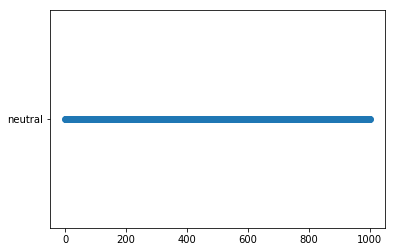

In [317]:
plt.scatter(range(mutant_ape_data.shape[0]), mutant_ape_data['sentiment'])